In [173]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import ast

# Evaluation on multimodal test set

In [174]:
multimodal_preds = pd.read_pickle('/home/robbe/IM2DeepMulti/preds/Test-BestPearsonBestModel-2024-04-08_09-33-13.pkl')
decoy_unimodal_preds = pd.read_pickle('/home/robbe/IM2DeepMulti/preds/decoyeval/DecoyModelUniSamples-2024-04-10_15-25-10.pkl')
decoy_multirandom_preds = pd.read_pickle('/home/robbe/IM2DeepMulti/preds/decoyeval/DecoyModelMultiRandom-2024-04-10_15-23-19.pkl')

In [175]:
def convert_to_float_list(matrix_str):
    # Remove brackets from the string and split it by whitespace
    values = matrix_str.strip('[]').split()
    # Convert each value to float
    float_list = [float(value) for value in values]
    return float_list

In [176]:
multimodal_preds['CCS1'] = multimodal_preds['CCS'].apply(lambda x: max(x))
multimodal_preds['CCS2'] = multimodal_preds['CCS'].apply(lambda x: min(x))
decoy_unimodal_preds['CCS1'] = decoy_unimodal_preds['CCS'].apply(lambda x: max(x))
decoy_unimodal_preds['CCS2'] = decoy_unimodal_preds['CCS'].apply(lambda x: min(x))
decoy_multirandom_preds['CCS1'] = decoy_multirandom_preds['CCS'].apply(lambda x: max(x))
decoy_multirandom_preds['CCS2'] = decoy_multirandom_preds['CCS'].apply(lambda x: min(x))
multimodal_preds['Smallest_prediction'] = multimodal_preds[['predicted_CCS1', 'predicted_CCS2']].min(axis=1)
decoy_unimodal_preds['Smallest_prediction'] = decoy_unimodal_preds[['DecoyModel_Prediction1', 'DecoyModel_Prediction2']].min(axis=1)
decoy_multirandom_preds['Smallest_prediction'] = decoy_multirandom_preds[['DecoyModel_Prediction1', 'DecoyModel_Prediction2']].min(axis=1)
multimodal_preds['Largest_prediction'] = multimodal_preds[['predicted_CCS1', 'predicted_CCS2']].max(axis=1)
decoy_unimodal_preds['Largest_prediction'] = decoy_unimodal_preds[['DecoyModel_Prediction1', 'DecoyModel_Prediction2']].max(axis=1)
decoy_multirandom_preds['Largest_prediction'] = decoy_multirandom_preds[['DecoyModel_Prediction1', 'DecoyModel_Prediction2']].max(axis=1)

Text(0.5, 0.98, 'Predicted CCS vs Observed CCS for decoy models and multimodal model on multimodal peptides')

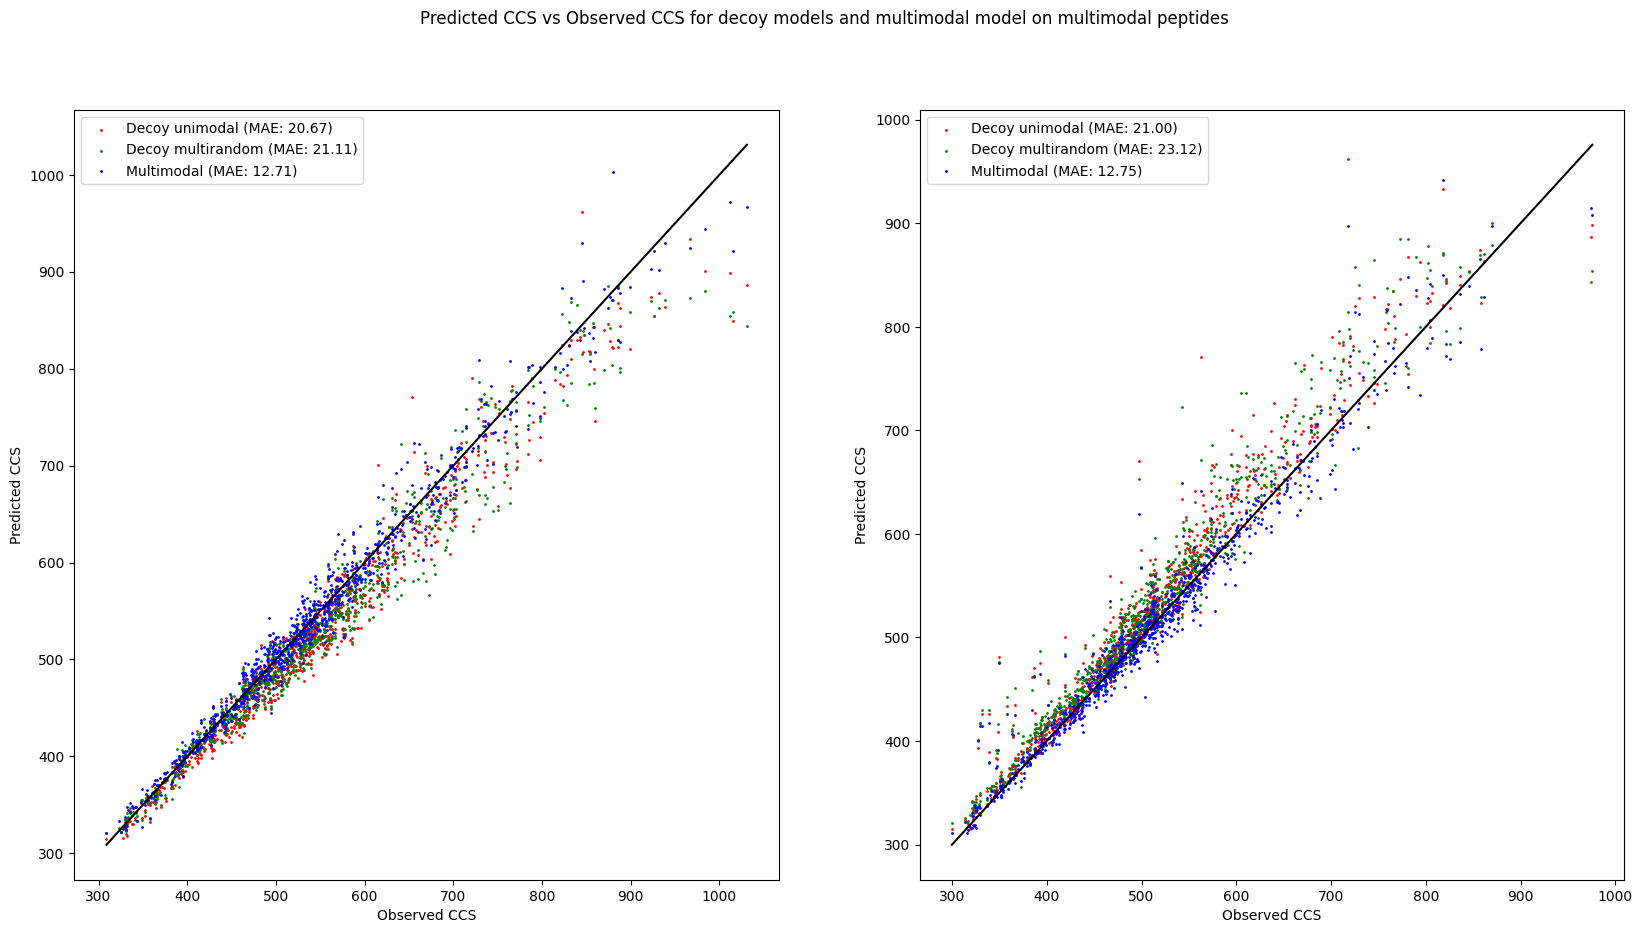

In [177]:
# Plot 3 overlapping scatter plots, twice, once for smallest target-prediction, once for largest target-prediction
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes[0].scatter(decoy_unimodal_preds['CCS1'], decoy_unimodal_preds['Largest_prediction'], color='red', label='Decoy unimodal', s=1)
axes[0].scatter(decoy_multirandom_preds['CCS1'], decoy_multirandom_preds['Largest_prediction'], color='green', label='Decoy multirandom', s=1)
axes[0].scatter(multimodal_preds['CCS1'], multimodal_preds['Largest_prediction'], color='blue', label='Multimodal', s=1)
axes[0].plot([min(decoy_multirandom_preds['CCS1']), max(decoy_multirandom_preds['CCS1'])], [min(decoy_multirandom_preds['CCS1']), max(decoy_multirandom_preds['CCS1'])], color="black")
axes[0].set_xlabel('Observed CCS')
axes[0].set_ylabel('Predicted CCS')
# Add MAE to legend for each plot
legend_text_multimodal = f'Multimodal (MAE: {np.mean(np.abs(multimodal_preds["Largest_prediction"] - multimodal_preds["CCS1"])):.2f})'
legend_text_decoy_unimodal = f'Decoy unimodal (MAE: {np.mean(np.abs(decoy_unimodal_preds["Largest_prediction"] - decoy_unimodal_preds["CCS1"])):.2f})'
legend_text_decoy_multirandom = f'Decoy multirandom (MAE: {np.mean(np.abs(decoy_multirandom_preds["Largest_prediction"] - decoy_multirandom_preds["CCS1"])):.2f})'
axes[0].legend([legend_text_decoy_unimodal, legend_text_decoy_multirandom, legend_text_multimodal])

axes[1].scatter(decoy_unimodal_preds['CCS2'], decoy_unimodal_preds['Smallest_prediction'], color='red', label='Decoy unimodal', s=1)
axes[1].scatter(decoy_multirandom_preds['CCS2'], decoy_multirandom_preds['Smallest_prediction'], color='green', label='Decoy multirandom', s=1)
axes[1].scatter(multimodal_preds['CCS2'], multimodal_preds['Smallest_prediction'], color='blue', label='Multimodal', s=1)
axes[1].plot([min(decoy_multirandom_preds['CCS2']), max(decoy_multirandom_preds['CCS2'])], [min(decoy_multirandom_preds['CCS2']), max(decoy_multirandom_preds['CCS2'])], color="black")
axes[1].set_xlabel('Observed CCS')
axes[1].set_ylabel('Predicted CCS')
# Add MAE to legend for each plot
legend_text_multimodal = f'Multimodal (MAE: {np.mean(np.abs(multimodal_preds["Smallest_prediction"] - multimodal_preds["CCS2"])):.2f})'
legend_text_decoy_unimodal = f'Decoy unimodal (MAE: {np.mean(np.abs(decoy_unimodal_preds["Smallest_prediction"] - decoy_unimodal_preds["CCS2"])):.2f})'
legend_text_decoy_multirandom = f'Decoy multirandom (MAE: {np.mean(np.abs(decoy_multirandom_preds["Smallest_prediction"] - decoy_multirandom_preds["CCS2"])):.2f})'
axes[1].legend([legend_text_decoy_unimodal, legend_text_decoy_multirandom, legend_text_multimodal])

fig.suptitle('Predicted CCS vs Observed CCS for decoy models and multimodal model on multimodal peptides')

# Evaluation on mixed testset

## Multimodal

In [178]:
## Load best model
import sys
from datetime import datetime
import torch
sys.path.append('/home/robbe/IM2DeepMulti')
sys.path.append('/home/robbe/IM2DeepMulti/IM2DeepMulti')
from IM2DeepMulti.models import IM2DeepMultiTransferWithAttention
import IM2DeepMulti.utils

In [179]:
config = {
    "name": "BestValPerformanceBestModel",
    "time": datetime.now().strftime("%Y-%m-%d_%H-%M-%S"),
    "batch_size": 32,
    "learning_rate": 0.0000885185503354955,
    "diversity_weight": 1.2631492541307987,    # Should be high when using FlexibleLoss (4.2), much lower when using FlexibleLossSorted (1)
    "L1_alpha": 0.00000043707211872154, #0.00003 for FlexibleLoss, 0.02 for FlexibleLossSorted
    "epochs": 300,
    "delta": 0,
    "device": "1",
    "Use_best_model": True,
    "Add_branch_layer": False,
    'BranchSize': 28, #64 seems to be the best
    'Loss_type': 'FlexibleLossSorted',
    'Use_attention_output': True,
    'Use_attention_concat': True,
}
criterion = IM2DeepMulti.utils.FlexibleLossSorted(config['diversity_weight'])

In [180]:
import pickle
import numpy as np
ccs_df = pickle.load(open('/home/robbe/IM2DeepMulti/data/ccs_df_EvaluationV2.pkl', 'rb'))
AtomEnc = pickle.load(open('/home/robbe/IM2DeepMulti/data/AtomEnc-EvaluationV2.pickle', 'rb'))
Globals = pickle.load(open('/home/robbe/IM2DeepMulti/data/GlobalFeatures-EvaluationV2.pickle', 'rb'))
DiAminoAtomEnc = pickle.load(open('/home/robbe/IM2DeepMulti/data/DiAminoAtomEnc-EvaluationV2.pickle', 'rb'))
OneHot = pickle.load(open('/home/robbe/IM2DeepMulti/data/OneHot-EvaluationV2.pickle', 'rb'))
y = pickle.load(open('/home/robbe/IM2DeepMulti/data/y_EvaluationV2.pickle', 'rb'))
y = np.vstack(y)

AtomEnc = torch.tensor(AtomEnc, dtype=torch.float32).to(torch.device('cuda'))
Globals = torch.tensor(Globals, dtype=torch.float32).to(torch.device('cuda'))
DiAminoAtomEnc = torch.tensor(DiAminoAtomEnc, dtype=torch.float32).to(torch.device('cuda'))
OneHot = torch.tensor(OneHot, dtype=torch.float32).to(torch.device('cuda'))
y = torch.tensor(y, dtype=torch.float32).to(torch.device('cuda'))
dataset = torch.utils.data.TensorDataset(AtomEnc, DiAminoAtomEnc, Globals, OneHot, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=config['batch_size'], shuffle=False)

### Multimodal

In [181]:
multimodal_model = IM2DeepMultiTransferWithAttention.load_from_checkpoint('/home/robbe/IM2DeepMulti/checkpoints/BestPearsonBestModel-2024-04-08_09-33-13.ckpt', config=config, criterion=criterion)

1335
480
20
6
1841


In [182]:
# Make predictions
multimodal_model.eval()
with torch.no_grad():
    predictions = []
    for batch in dataloader:
        prediction = multimodal_model.predict_step(batch)
        predictions.append(prediction)
    predictions = torch.cat(predictions, dim=0)

In [183]:
ccs_df['multimodal_predicted_CCS1'] = predictions[:, 0].cpu().numpy()
ccs_df['multimodal_predicted_CCS2'] = predictions[:, 1].cpu().numpy()

### Decoy unimodal

In [184]:
AtomEnc = pickle.load(open('/home/robbe/IM2DeepMulti/data/AtomEnc-EvaluationV2.pickle', 'rb'))
Globals = pickle.load(open('/home/robbe/IM2DeepMulti/data/GlobalFeatures-EvaluationV2.pickle', 'rb'))
DiAminoAtomEnc = pickle.load(open('/home/robbe/IM2DeepMulti/data/DiAminoAtomEnc-EvaluationV2.pickle', 'rb'))
OneHot = pickle.load(open('/home/robbe/IM2DeepMulti/data/OneHot-EvaluationV2.pickle', 'rb'))
y = pickle.load(open('/home/robbe/IM2DeepMulti/data/y_EvaluationV2.pickle', 'rb'))
y = np.vstack(y)

AtomEnc = torch.tensor(AtomEnc, dtype=torch.float32).to(torch.device('cuda:1'))
Globals = torch.tensor(Globals, dtype=torch.float32).to(torch.device('cuda:1'))
DiAminoAtomEnc = torch.tensor(DiAminoAtomEnc, dtype=torch.float32).to(torch.device('cuda:1'))
OneHot = torch.tensor(OneHot, dtype=torch.float32).to(torch.device('cuda:1'))
y = torch.tensor(y, dtype=torch.float32).to(torch.device('cuda:1'))
dataset = torch.utils.data.TensorDataset(AtomEnc, DiAminoAtomEnc, Globals, OneHot, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=config['batch_size'], shuffle=False)

In [185]:
sys.path.append('/home/robbe/IM2DeepMulti/evaluations')
from train_decoy_model_unisamples import IM2DeepMultiTransferWithAttentionDecoy, DecoyLoss
criterion = DecoyLoss()

In [186]:
decoy_unimodal_model = IM2DeepMultiTransferWithAttentionDecoy.load_from_checkpoint('/home/robbe/IM2DeepMulti/checkpoints/decoyeval/DecoyModelUniSamples-2024-04-10_15-25-10.ckpt', config=config, criterion=criterion)

1335
480
20
6
1841


In [187]:
# Make predictions
decoy_unimodal_model.eval()
with torch.no_grad():
    predictions = []
    for batch in dataloader:
        prediction = decoy_unimodal_model.predict_step(batch)
        predictions.append(prediction)
    predictions = torch.cat(predictions, dim=0)

In [188]:
ccs_df['decoy_unimodal_predicted_CCS1'] = predictions[:, 0].cpu().numpy()
ccs_df['decoy_unimodal_predicted_CCS2'] = predictions[:, 1].cpu().numpy()

### Decoy multirandom

In [189]:
decoy_multirandom_model = IM2DeepMultiTransferWithAttentionDecoy.load_from_checkpoint('/home/robbe/IM2DeepMulti/checkpoints/decoyeval/DecoyModelMultiRandom-2024-04-10_15-23-19.ckpt', config=config, criterion=criterion)

1335
480
20
6
1841


In [190]:
# Make predictions
decoy_multirandom_model.eval()
with torch.no_grad():
    predictions = []
    for batch in dataloader:
        prediction = decoy_multirandom_model.predict_step(batch)
        predictions.append(prediction)
    predictions = torch.cat(predictions, dim=0)

In [191]:
ccs_df['decoy_multirandom_predicted_CCS1'] = predictions[:, 0].cpu().numpy()
ccs_df['decoy_multirandom_predicted_CCS2'] = predictions[:, 1].cpu().numpy()

In [192]:
ccs_df

,Modified sequence,Intensity,charge,m/z,Retention time,Raw file,Experiment,1/K0,CCS,between_brackets,seq,modifications,tr,multimodal_predicted_CCS1,multimodal_predicted_CCS2,decoy_unimodal_predicted_CCS1,decoy_unimodal_predicted_CCS2,decoy_multirandom_predicted_CCS1,decoy_multirandom_predicted_CCS2
0,(ac)AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,44101.0,3,1121.204960,18.102,12_S1-B12_1_7060,C4,1.148689,692.93933,Acetyl (Protein N-term,AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,0|Acetyl,0,694.902161,673.718811,732.599365,732.539062,711.792542,712.111145
1,(ac)AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,108470.0,3,1121.204960,18.162,7_S1-B2_1_7050,B3,1.148689,692.93933,Acetyl (Protein N-term,AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,0|Acetyl,0,694.902161,673.718811,732.599365,732.539062,711.792542,712.111145
2,(ac)AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,81176.0,3,1121.204960,18.120,8_S1-B4_1_7052,B4,1.143574,689.85360,Acetyl (Protein N-term,AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,0|Acetyl,0,694.902161,673.718811,732.599365,732.539062,711.792542,712.111145
3,(ac)AAAAAGPGAWAAQEK,12718.0,2,706.351865,24.833,4_S1-A8_1_7044,A4,1.087225,439.72745,Acetyl (Protein N-term,AAAAAGPGAWAAQEK,0|Acetyl,0,439.935181,413.782288,406.316040,406.304382,415.526276,415.796570
4,(ac)AAAAAMAEQEGAR,37584.0,2,644.801151,23.007,7_S1-B2_1_7050,B3,0.984387,398.50415,Acetyl (Protein N-term,AAAAAMAEQEGAR,0|Acetyl,0,397.589111,371.591156,390.444641,390.439453,391.036530,391.370575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48262,YYTSASGDEM(ox)VSLKDYCTR,387300.0,3,754.661159,18.328,4_S1-A8_1_7044,A4,0.989541,598.13030,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,608.455383,567.058167,568.925171,568.907898,572.755432,572.582092
48263,YYTSASGDEM(ox)VSLKDYCTR,214360.0,3,754.661159,18.409,5_S1-A10_1_7046,B1,0.992117,599.68760,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,608.455383,567.058167,568.925171,568.907898,572.755432,572.582092
48264,YYTSASGDEM(ox)VSLKDYCTR,265250.0,3,754.661159,18.409,6_S1-A12_1_7048,B2,0.989541,598.13030,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,608.455383,567.058167,568.925171,568.907898,572.755432,572.582092
48265,YYTSASGDEM(ox)VSLKDYCTR,468150.0,3,754.661159,18.487,8_S1-B4_1_7052,B4,0.992117,599.68760,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,608.455383,567.058167,568.925171,568.907898,572.755432,572.582092


### Align

In [193]:
# Calculate shifts per charge and instead of adding charge to PXD data, add shift to predictions
Evaluation_dataset_with_overlap = pd.read_csv('/home/robbe/IM2DeepMulti/dataset/Evaluation_dataset_with_overlap_v2.csv')
traindata = pd.read_csv('/home/robbe/IM2DeepMulti/dataset/final_conformers_filtered.csv')
traindata.head()

,Modified sequence,Charge,Accession,Conformer id,CCS,Intensity,Conformer id total
0,_YRPGTVALR_,2,PXD043226,2.0,368.427155,4.730200e+07,1.0
1,_YRPGTVALR_,2,PXD036191,1.0,364.510139,4.055425e+07,1.0
2,_YPIEHGIITNWDDMEK_,3,PXD036191,2.0,545.583121,3.716250e+07,1.0
3,_RYDDPEVQK_,2,PXD019086,2.0,382.515895,2.952900e+07,1.0
4,_VTIAQGGVLPNIQAVLLPK_,2,PXD040521,2.0,509.465589,2.778083e+07,1.0


In [194]:
def align(Evaluation_dataset_with_overlap, traindata, ccs_df):
    for i, run in enumerate(Evaluation_dataset_with_overlap['Raw file'].unique()):
        shift_dict = {}
        data_run = Evaluation_dataset_with_overlap[Evaluation_dataset_with_overlap['Raw file'] == run]

        try:
            merged = pd.merge(data_run, traindata, on=['Modified sequence', 'Charge'], how='inner', suffixes=('_data', '_train'))
            shift_dict = merged.groupby('Charge').apply(lambda x: x['CCS_train'].mean() - x['CCS_data'].mean()).to_dict() #How much train data is bigger, so we need to decrease the predictions by these amounts
            print('Shifts for run', run, shift_dict)
            for charge, shift in shift_dict.items():
                ccs_df.loc[(ccs_df['Raw file'] == run) & (ccs_df['charge'] == charge), 'multimodal_predicted_CCS1'] -= shift
                ccs_df.loc[(ccs_df['Raw file'] == run) & (ccs_df['charge'] == charge), 'multimodal_predicted_CCS2'] -= shift
                ccs_df.loc[(ccs_df['Raw file'] == run) & (ccs_df['charge'] == charge), 'decoy_unimodal_predicted_CCS1'] -= shift
                ccs_df.loc[(ccs_df['Raw file'] == run) & (ccs_df['charge'] == charge), 'decoy_unimodal_predicted_CCS2'] -= shift
                ccs_df.loc[(ccs_df['Raw file'] == run) & (ccs_df['charge'] == charge), 'decoy_multirandom_predicted_CCS1'] -= shift
                ccs_df.loc[(ccs_df['Raw file'] == run) & (ccs_df['charge'] == charge), 'decoy_multirandom_predicted_CCS2'] -= shift


        except Exception as e:
            print('No overlap found for run', run, e)
            continue
    return ccs_df




In [195]:
traindata_highest_intensity = traindata.groupby(['Modified sequence', 'Charge'], as_index=False).apply(lambda x: x.loc[x['Intensity'].idxmax()])

In [196]:
ccs_df_aligned = align(Evaluation_dataset_with_overlap, traindata_highest_intensity, ccs_df)

Shifts for run 7_S1-B2_1_7050 {2: 1.04781884898091, 3: -2.280390125931035, 4: 9.263762297948347}
Shifts for run 8_S1-B4_1_7052 {2: 1.039570825826388, 3: -2.7570495788068, 4: 7.628661245579565}
Shifts for run 10_S1-B8_1_7056 {2: -0.20169895620989564, 3: -3.478919949988608, 4: 4.135979147856801}
Shifts for run 11_S1-B10_1_7058 {2: 1.7901351136312087, 3: -0.5677155591281462, 4: 10.37947225078483}
Shifts for run 13_S1-C2_1_7062 {2: 1.5683317215787156, 3: -0.4178744781003161, 4: 7.982929910693429}
Shifts for run 14_S1-C4_1_7064 {2: 1.7925865379667698, 3: -0.5235367595315665, 4: 9.302570846207004}
Shifts for run 15_S1-C6_1_7066 {2: 2.3798096229232897, 3: 0.3899451843586803, 4: 9.783171514782453}
Shifts for run 16_S1-C8_1_7068 {2: 1.5602307836155092, 3: -1.7118445200544556, 4: 7.219675698172068}
Shifts for run 1_S1-A2_1_7038 {2: 2.0605733476887167, 3: -1.0084593694998603, 4: 4.878739452178706}
Shifts for run 2_S1-A4_1_7040 {2: 0.6822124512648884, 3: -2.51388165852552, 4: 6.769570424913923}
Sh

### Visualize performance

In [197]:
ccs_df_aligned

,Modified sequence,Intensity,charge,m/z,Retention time,Raw file,Experiment,1/K0,CCS,between_brackets,seq,modifications,tr,multimodal_predicted_CCS1,multimodal_predicted_CCS2,decoy_unimodal_predicted_CCS1,decoy_unimodal_predicted_CCS2,decoy_multirandom_predicted_CCS1,decoy_multirandom_predicted_CCS2
0,(ac)AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,44101.0,3,1121.204960,18.102,12_S1-B12_1_7060,C4,1.148689,692.93933,Acetyl (Protein N-term,AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,0|Acetyl,0,696.946350,675.763000,734.643555,734.583252,713.836731,714.155334
1,(ac)AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,108470.0,3,1121.204960,18.162,7_S1-B2_1_7050,B3,1.148689,692.93933,Acetyl (Protein N-term,AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,0|Acetyl,0,697.182556,675.999207,734.879761,734.819458,714.072937,714.391541
2,(ac)AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,81176.0,3,1121.204960,18.120,8_S1-B4_1_7052,B4,1.143574,689.85360,Acetyl (Protein N-term,AAAAAAGSGTPREEEAPGGEAAASQAQAPTSAPGGVR,0|Acetyl,0,697.659180,676.475830,735.356445,735.296143,714.549561,714.868164
3,(ac)AAAAAGPGAWAAQEK,12718.0,2,706.351865,24.833,4_S1-A8_1_7044,A4,1.087225,439.72745,Acetyl (Protein N-term,AAAAAGPGAWAAQEK,0|Acetyl,0,438.160431,412.007538,404.541290,404.529633,413.751526,414.021820
4,(ac)AAAAAMAEQEGAR,37584.0,2,644.801151,23.007,7_S1-B2_1_7050,B3,0.984387,398.50415,Acetyl (Protein N-term,AAAAAMAEQEGAR,0|Acetyl,0,396.541290,370.543335,389.396820,389.391632,389.988708,390.322754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48262,YYTSASGDEM(ox)VSLKDYCTR,387300.0,3,754.661159,18.328,4_S1-A8_1_7044,A4,0.989541,598.13030,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,609.239868,567.842651,569.709656,569.692383,573.539917,573.366577
48263,YYTSASGDEM(ox)VSLKDYCTR,214360.0,3,754.661159,18.409,5_S1-A10_1_7046,B1,0.992117,599.68760,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,609.720215,568.322998,570.190002,570.172729,574.020264,573.846924
48264,YYTSASGDEM(ox)VSLKDYCTR,265250.0,3,754.661159,18.409,6_S1-A12_1_7048,B2,0.989541,598.13030,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,609.418823,568.021606,569.888611,569.871338,573.718872,573.545532
48265,YYTSASGDEM(ox)VSLKDYCTR,468150.0,3,754.661159,18.487,8_S1-B4_1_7052,B4,0.992117,599.68760,Oxidation (M,YYTSASGDEMVSLKDYCTR,10|Oxidation|17|Carbamidomethyl,0,611.212402,569.815186,571.682251,571.664917,575.512451,575.339111


In [198]:
ccs_df_aligned['Closest_multimodal_prediction'] = ccs_df_aligned.apply(lambda x: x['multimodal_predicted_CCS1'] if abs(x['CCS'] - x['multimodal_predicted_CCS1']) < abs(x['CCS'] - x['multimodal_predicted_CCS2']) else x['multimodal_predicted_CCS2'], axis=1)
ccs_df_aligned['Closest_decoy_unimodal_prediction'] = ccs_df_aligned.apply(lambda x: x['decoy_unimodal_predicted_CCS1'] if abs(x['CCS'] - x['decoy_unimodal_predicted_CCS1']) < abs(x['CCS'] - x['decoy_unimodal_predicted_CCS2']) else x['decoy_unimodal_predicted_CCS2'], axis=1)
ccs_df_aligned['Closest_decoy_multirandom_prediction'] = ccs_df_aligned.apply(lambda x: x['decoy_multirandom_predicted_CCS1'] if abs(x['CCS'] - x['decoy_multirandom_predicted_CCS1']) < abs(x['CCS'] - x['decoy_multirandom_predicted_CCS2']) else x['decoy_multirandom_predicted_CCS2'], axis=1)


Text(0.5, 0.98, 'Predicted CCS vs Observed CCS for decoy models and multimodal model on uni and multimodal peptides')

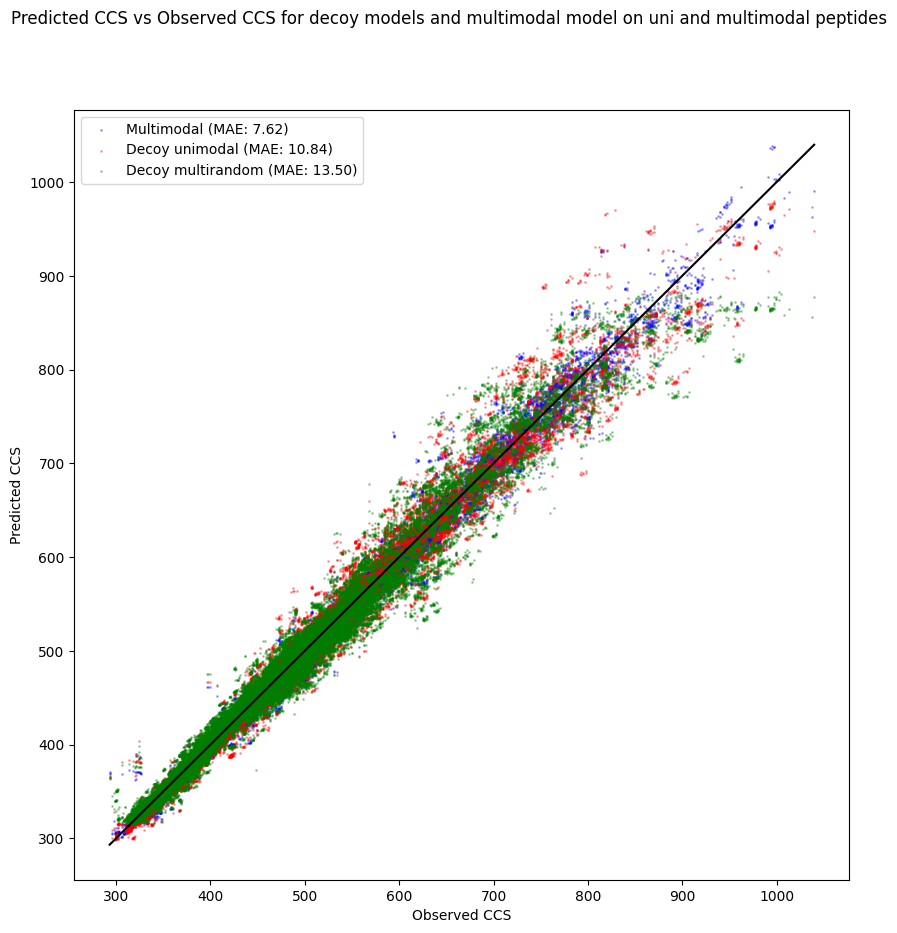

In [201]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(ccs_df_aligned['CCS'], ccs_df_aligned['Closest_multimodal_prediction'], color='blue', label='Multimodal', s=1, alpha=0.3)
ax.scatter(ccs_df_aligned['CCS'], ccs_df_aligned['Closest_decoy_unimodal_prediction'], color='red', label='Decoy unimodal', s=1, alpha=0.3)
ax.scatter(ccs_df_aligned['CCS'], ccs_df_aligned['Closest_decoy_multirandom_prediction'], color='green', label='Decoy multirandom', s=1, alpha=0.3)
ax.plot([min(ccs_df_aligned['CCS']), max(ccs_df_aligned['CCS'])], [min(ccs_df_aligned['CCS']), max(ccs_df_aligned['CCS'])], color="black")
ax.set_xlabel('Observed CCS')
ax.set_ylabel('Predicted CCS')
# Add MAE to legend for each plot
legend_text_multimodal = f'Multimodal (MAE: {np.mean(np.abs(ccs_df_aligned["Closest_multimodal_prediction"] - ccs_df_aligned["CCS"])):.2f})'
legend_text_decoy_unimodal = f'Decoy unimodal (MAE: {np.mean(np.abs(ccs_df_aligned["Closest_decoy_unimodal_prediction"] - ccs_df_aligned["CCS"])):.2f})'
legend_text_decoy_multirandom = f'Decoy multirandom (MAE: {np.mean(np.abs(ccs_df_aligned["Closest_decoy_multirandom_prediction"] - ccs_df_aligned["CCS"])):.2f})'
ax.legend([legend_text_multimodal, legend_text_decoy_unimodal, legend_text_decoy_multirandom])

fig.suptitle('Predicted CCS vs Observed CCS for decoy models and multimodal model on uni and multimodal peptides')
